In [6]:
import pandas as pd


x = pd.read_csv('https://apmonitor.com/che263/uploads/Main/heart_rate.txt')
x.head()


,Time (sec),Heart Rate (BPM)
0,0.0,103
1,5.0,103
2,10.0,103
3,15.0,105
4,20.0,108


In [5]:
x.describe()
"""
BPM = C0 + c1t-c2e^-c3t
"""



,Time (sec),Heart Rate (BPM)
count,241.000000,241.000000
mean,600.000000,142.983402
std,348.574478,11.387115
min,0.000000,103.000000
25%,300.000000,138.000000
50%,600.000000,147.000000
75%,900.000000,151.000000
max,1200.000000,154.000000


In [22]:
"""
def bpm(t,c0,c1,c2,c3):
    return c0+c1*t-c2*np.exp(-c3*t)
"""

'\ndef bpm(t,c0,c1,c2,c3):\n    return c0+c1*t-c2*np.exp(-c3*t)\n'

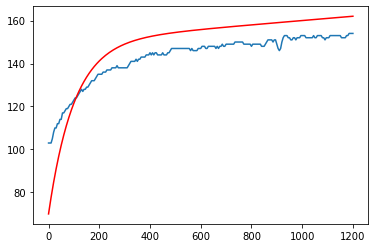

In [28]:
import numpy as np

def bpm(t,c0,c1,c2,c3):
    return c0+c1*t-c2*np.exp(-c3*t)
#guess
g = [150, 0.01, 80, 0.01]

%matplotlib inline
import matplotlib.pyplot as plt

#make prediction
n = len(x['Time (sec)'])
y = np.empty(n)
for i in range(n):
    y[i] = bpm(x['Time (sec)'][i],g[0], g[1], g[2], g[3])
    

plt.plot(x['Time (sec)'],x['Heart Rate (BPM)'])

#plot the prediction
plt.plot(x['Time (sec)'], y, 'r')


[1.42373197e+02 9.24806099e-03 4.00292043e+01 6.84029118e-03]


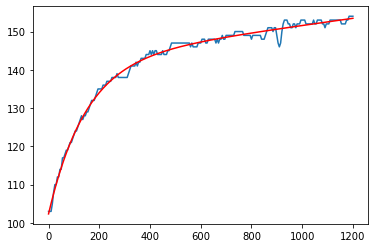

In [31]:
#fit the curve
from scipy.optimize import curve_fit
t = x['Time (sec)'].values
hr = x['Heart Rate (BPM)'].values
c, cov = curve_fit(bpm, t,hr,g)
print(c)

#make prediction

for i in range(n):
    y[i] = bpm(x['Time (sec)'][i],c[0], c[1], c[2], c[3])
    

plt.plot(x['Time (sec)'],x['Heart Rate (BPM)'])

#plot the prediction
plt.plot(x['Time (sec)'], y, 'r')



In [33]:
#calculate R2
from sklearn.metrics import r2_score
print('R^2:', r2_score(y, hr))

R^2: 0.9929887696765815
